# Características
En las funciones booleanas, 1 significa "sí" y 2 significa "no". valores como 97 y 99 significa datos faltantes.
| **Atributo**         | **Descripción**                                                                                   |
|----------------------|--------------------------------------------------------------------------------------------------|
| **USMER**            | Indica si el paciente fue atendido en unidades médicas de primer, segundo o tercer nivel.       |
| **MEDICAL_UNIT**     | Tipo de institución del Sistema Nacional de Salud que proporcionó la atención.                   |
| **SEX**              | 1 para mujer, 2 para hombre.                                                                    |
| **PATIENT_TYPE**     | Tipo de atención recibida: 1 para retorno a casa, 2 para hospitalización.                       |
| **DATE_DIED**        | Fecha de fallecimiento, o `9999-99-99` si el paciente no falleció.                               |
| **INTUBED**        | Indica si el paciente estaba conectado a un ventilador                   |
| **PNEUMONIA**     | Indica si el paciente tenía neumonía                                         |
| **AGE**           | Edad del paciente.                                                                              |
| **PREGNANT**      | Indica si el paciente está embarazada                                       |
| **DIABETES**      | Indica si el paciente tiene diabetes                                        |
| **COPD**          | Indica si el paciente tiene enfermedad pulmonar obstructiva crónica         |
| **ASTHMA**       | Indica si el paciente tiene asma                                           |
| **INMSUPR**      | Indica si el paciente está inmunodeprimido                                 |
| **HIPERTENSION**  | Indica si el paciente tiene hipertensión                                 |
| **OTHER_DISEASE** | Indica si el paciente tiene otras enfermedades                               |
| **CARDIOVASCULAR** | Indica si el paciente tiene enfermedad cardiovascular                       |
| **OBESITY**       | Indica si el paciente tiene obesidad                                        |
| **RENAL_CHRONIC** | Indica si el paciente tiene enfermedad renal crónica                        |
| **TOBACCO**       | Indica si el paciente consume tabaco                                       |
| **CLASIFFICATION_FINAL** | Resultados de la prueba de Covid-19: 1-3 para casos confirmados (diferentes grados), 4+ para casos no confirmados. |
| **ICU**           | Indica si el paciente ingresó a la Unidad de Cuidados Intensivos           |

In [251]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
from catboost import CatBoostClassifier
import lightgbm as lgb
from imblearn.over_sampling import SMOTE
import re
from sklearn.metrics import precision_recall_curve

# Análisis Exploratorio

In [198]:
df = pd.read_csv("./Covid Data.csv")
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [200]:
df.describe()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.632194e+00,8.980565e+00,1.499259e+00,1.190765e+00,7.952288e+01,3.346831e+00,4.179410e+01,4.976558e+01,2.186404e+00,2.260569e+00,2.242626e+00,2.298132e+00,2.128989e+00,2.435143e+00,2.261810e+00,2.125176e+00,2.257180e+00,2.214333e+00,5.305653e+00,7.955397e+01
std,4.822084e-01,3.723278e+00,4.999997e-01,3.929041e-01,3.686889e+01,1.191288e+01,1.690739e+01,4.751073e+01,5.424242e+00,5.132258e+00,5.114089e+00,5.462843e+00,5.236397e+00,6.646676e+00,5.194850e+00,5.175445e+00,5.135354e+00,5.323097e+00,1.881165e+00,3.682307e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,3.000000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,9.700000e+01
50%,2.000000e+00,1.200000e+01,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,4.000000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,6.000000e+00,9.700000e+01
75%,2.000000e+00,1.200000e+01,2.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,5.300000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,7.000000e+00,9.700000e+01
max,2.000000e+00,1.300000e+01,2.000000e+00,2.000000e+00,9.900000e+01,9.900000e+01,1.210000e+02,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,7.000000e+00,9.900000e+01


In [201]:
df.isnull().sum()

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
dtype: int64

## Limpieza

Cambiar DATE_DIED por 0 si es 9999-99-99 o 1 si es cualquier otro

In [202]:
def cambiar_fecha(fecha):
    fecha = str(fecha)
    if fecha == '9999-99-99':
        return 0
    else:
        return 1

df['DIED'] = df['DATE_DIED'].apply(cambiar_fecha)

df = df.drop('DATE_DIED', axis=1)

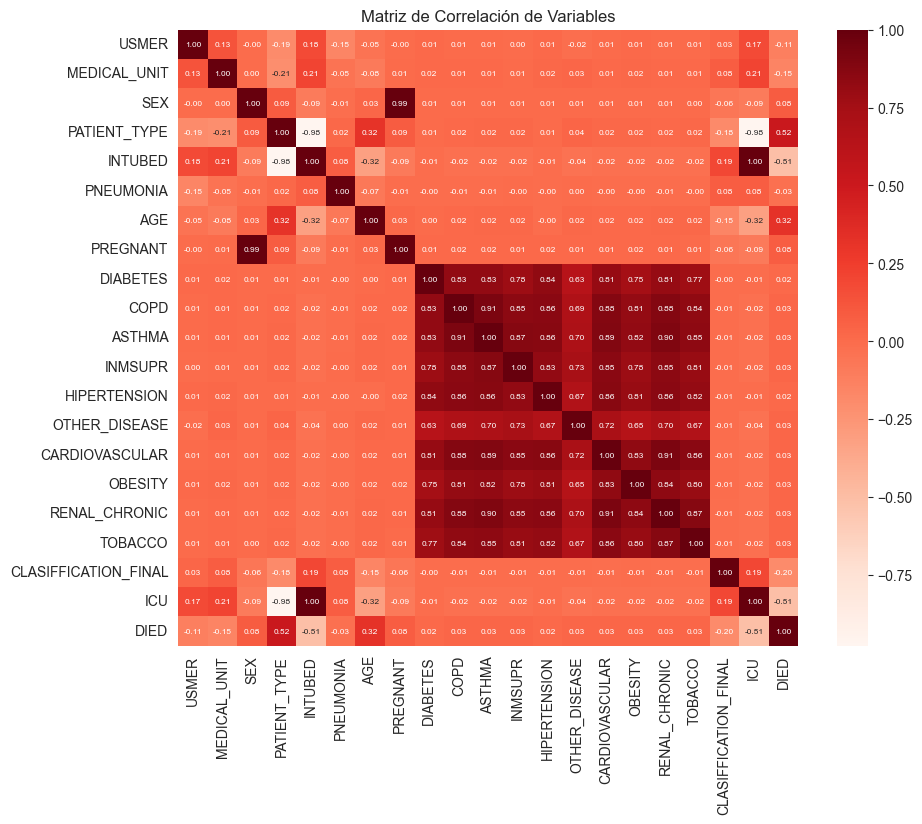

In [203]:
plt.figure(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, cmap='Reds', annot=True, fmt=".2f", annot_kws={'size': 6})
plt.title('Matriz de Correlación de Variables')
plt.show()

Quito ICU por ser una copia de INTUBED

In [204]:
df = df.drop('ICU', axis=1)

Cambiar a booleanos y a None

In [205]:
def to_bool(num):
    if num == 1:
        return 1

    if num == 2:
        return 0

    return None

bool_cols = ['USMER', 'INTUBED', 'PNEUMONIA', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC', 'TOBACCO']

for col in bool_cols:
    df[col] = df[col].apply(to_bool)

Creo HOSPITALIZED basandome en PATIENT_TYPE

In [206]:
df["HOSPITALIZED"] = df["PATIENT_TYPE"].apply(lambda x: 1 if x == 2 else 0)
df = df.drop('PATIENT_TYPE', axis=1)

Quitao resultados no concluyentes (CLASIFFICATION_FINAL = 4)

In [207]:
rows_to_drop = df[df['CLASIFFICATION_FINAL'] == 4].index

df.drop(rows_to_drop, inplace=True)

### Tratar Nulos

In [208]:
df.isnull().sum()

USMER                        0
MEDICAL_UNIT                 0
SEX                          0
INTUBED                 853339
PNEUMONIA                15992
AGE                          0
PREGNANT                525732
DIABETES                  3332
COPD                      2999
ASTHMA                    2974
INMSUPR                   3399
HIPERTENSION              3101
OTHER_DISEASE             5030
CARDIOVASCULAR            3072
OBESITY                   3029
RENAL_CHRONIC             3003
TOBACCO                   3216
CLASIFFICATION_FINAL         0
DIED                         0
HOSPITALIZED                 0
dtype: int64

#### Tratar PREGNANT

In [209]:
df["PREGNANT"].describe()

count    519721.000000
mean          0.015606
std           0.123947
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: PREGNANT, dtype: float64

Pongo PREGNANT como false si es hombre

In [210]:
df['PREGNANT'] = df.apply(lambda row: 0 if row['SEX'] == 2 else row['PREGNANT'], axis=1)

In [211]:
df.isnull().sum()["PREGNANT"]

3751

In [212]:
df["PREGNANT"].describe()

count    1.041702e+06
mean     7.786296e-03
std      8.789583e-02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+00
Name: PREGNANT, dtype: float64

### Tratar INTUBED

Por la alta correlación entre intubed y el tipo de paciente (hospitalizado) voy a ver la contigencia para poder imputar INTUBED.

In [213]:
df['INTUBED_IS_NULL'] = df['INTUBED'].isnull().astype(int)

contingency = pd.crosstab(
    df['HOSPITALIZED'],
    df['INTUBED_IS_NULL']
)

df = df.drop('INTUBED_IS_NULL', axis=1)

print(contingency)

chi2, p, dof, expected = chi2_contingency(contingency)

print(f"Chi2: {chi2}")
print(f"Grados de Libertad: {dof}")
print(f"P-Valor: {p}")

print("-----")

contingency = pd.crosstab(
    df['HOSPITALIZED'],
    df['INTUBED']
)
print(contingency)

chi2, p, dof, expected = chi2_contingency(contingency)

print(f"Chi2: {chi2}")
print(f"Grados de Libertad: {dof}")
print(f"P-Valor: {p}")



INTUBED_IS_NULL       0       1
HOSPITALIZED                   
0                     0  846028
1                192114    7311
Chi2: 998491.2779551606
Grados de Libertad: 1
P-Valor: 0.0
-----
INTUBED          0.0    1.0
HOSPITALIZED               
1             158507  33607
Chi2: 0.0
Grados de Libertad: 0
P-Valor: 1.0


#### Si no fué hospitalizado, entonces no estuvo intubado
Después de observar la contingencia entre HOSPITALIZED y INTUBED, me doy cuenta que puedo establecer en todos los no hospitalizados el valor INTUBED como false.

In [214]:
df['INTUBED'] = df.apply(lambda row: 0 if row['HOSPITALIZED'] == 0 else row['INTUBED'], axis=1)

In [215]:
df.isnull().sum()["INTUBED"]

7311

#### Imputar nulos restantes

In [216]:
df.isnull().sum()

USMER                       0
MEDICAL_UNIT                0
SEX                         0
INTUBED                  7311
PNEUMONIA               15992
AGE                         0
PREGNANT                 3751
DIABETES                 3332
COPD                     2999
ASTHMA                   2974
INMSUPR                  3399
HIPERTENSION             3101
OTHER_DISEASE            5030
CARDIOVASCULAR           3072
OBESITY                  3029
RENAL_CHRONIC            3003
TOBACCO                  3216
CLASIFFICATION_FINAL        0
DIED                        0
HOSPITALIZED                0
dtype: int64

In [217]:
df_impute = df.copy()

iter_imputer = IterativeImputer(max_iter=10, random_state=42, initial_strategy='most_frequent')

df_impute[bool_cols] = iter_imputer.fit_transform(df_impute[bool_cols])

df_impute[bool_cols] = df_impute[bool_cols].round().astype(int)

df[bool_cols] = df_impute[bool_cols]

print("\nValores faltantes después de imputar con IterativeImputer:")
print(df[bool_cols].isnull().sum())


Valores faltantes después de imputar con IterativeImputer:
USMER             0
INTUBED           0
PNEUMONIA         0
PREGNANT          0
DIABETES          0
COPD              0
ASTHMA            0
INMSUPR           0
HIPERTENSION      0
OTHER_DISEASE     0
CARDIOVASCULAR    0
OBESITY           0
RENAL_CHRONIC     0
TOBACCO           0
dtype: int64


Comprobar valores únicos

In [218]:
for col in bool_cols:
    unique_values = df[col].unique()
    print(f"\nValores únicos en {col}: {unique_values}")


Valores únicos en USMER: [0 1]

Valores únicos en INTUBED: [0 1]

Valores únicos en PNEUMONIA: [1 0]

Valores únicos en PREGNANT: [0 1]

Valores únicos en DIABETES: [0 1]

Valores únicos en COPD: [0 1]

Valores únicos en ASTHMA: [0 1]

Valores únicos en INMSUPR: [0 1]

Valores únicos en HIPERTENSION: [1 0]

Valores únicos en OTHER_DISEASE: [0 1]

Valores únicos en CARDIOVASCULAR: [0 1]

Valores únicos en OBESITY: [0 1]

Valores únicos en RENAL_CHRONIC: [0 1]

Valores únicos en TOBACCO: [0 1]


In [219]:
for col in bool_cols:
    counts = df[col].value_counts().sort_index()
    print(f"\nDistribución de {col}:")
    print(counts)


Distribución de USMER:
USMER
0    660561
1    384892
Name: count, dtype: int64

Distribución de INTUBED:
INTUBED
0    1011846
1      33607
Name: count, dtype: int64

Distribución de PNEUMONIA:
PNEUMONIA
0    905623
1    139830
Name: count, dtype: int64

Distribución de PREGNANT:
PREGNANT
0    1037342
1       8111
Name: count, dtype: int64

Distribución de DIABETES:
DIABETES
0    920799
1    124654
Name: count, dtype: int64

Distribución de COPD:
COPD
0    1030438
1      15015
Name: count, dtype: int64

Distribución de ASTHMA:
ASTHMA
0    1013950
1      31503
Name: count, dtype: int64

Distribución de INMSUPR:
INMSUPR
0    1031316
1      14137
Name: count, dtype: int64

Distribución de HIPERTENSION:
HIPERTENSION
0    883010
1    162443
Name: count, dtype: int64

Distribución de OTHER_DISEASE:
OTHER_DISEASE
0    1017437
1      28016
Name: count, dtype: int64

Distribución de CARDIOVASCULAR:
CARDIOVASCULAR
0    1024740
1      20713
Name: count, dtype: int64

Distribución de OBESITY:
OBES

## Guradar y cargar datos limpios

In [220]:
df.to_csv("./clean_covid_data.csv", index=False)

In [327]:
df = pd.read_csv("./clean_covid_data.csv")
df = df.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

## Análisis exploratorio de datos limpios

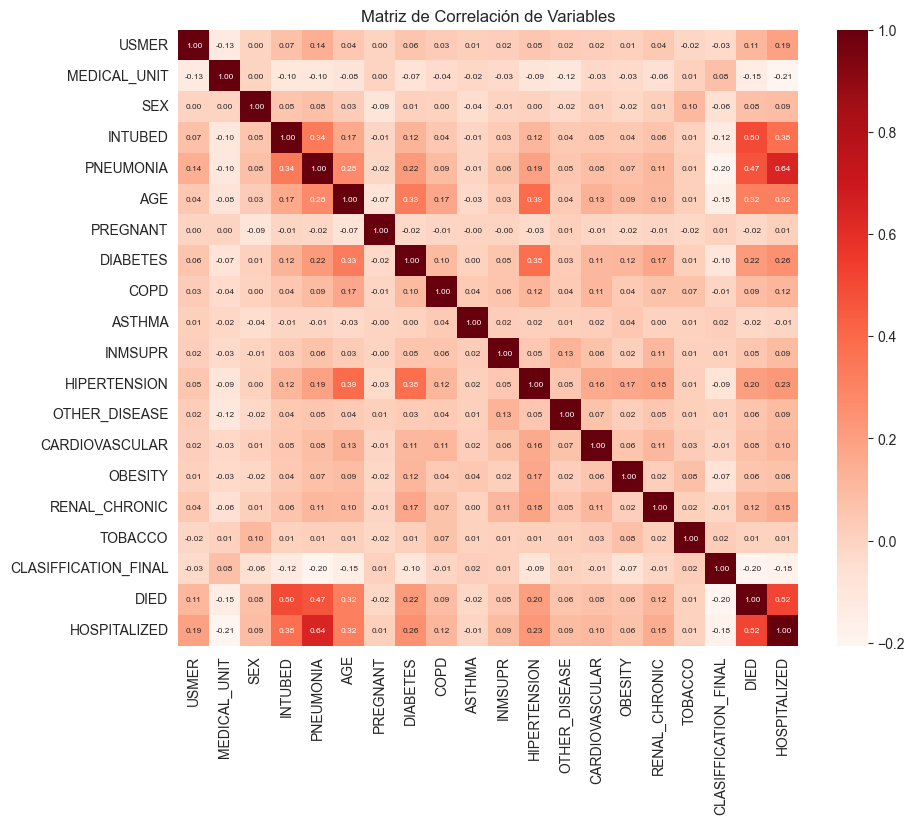

In [249]:
plt.figure(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, cmap='Reds', annot=True, fmt=".2f", annot_kws={'size': 6})
plt.title('Matriz de Correlación de Variables')
plt.show()

In [224]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1045453 entries, 0 to 1045452
Data columns (total 20 columns):
 #   Column                Non-Null Count    Dtype
---  ------                --------------    -----
 0   USMER                 1045453 non-null  int64
 1   MEDICAL_UNIT          1045453 non-null  int64
 2   SEX                   1045453 non-null  int64
 3   INTUBED               1045453 non-null  int64
 4   PNEUMONIA             1045453 non-null  int64
 5   AGE                   1045453 non-null  int64
 6   PREGNANT              1045453 non-null  int64
 7   DIABETES              1045453 non-null  int64
 8   COPD                  1045453 non-null  int64
 9   ASTHMA                1045453 non-null  int64
 10  INMSUPR               1045453 non-null  int64
 11  HIPERTENSION          1045453 non-null  int64
 12  OTHER_DISEASE         1045453 non-null  int64
 13  CARDIOVASCULAR        1045453 non-null  int64
 14  OBESITY               1045453 non-null  int64
 15  RENAL_CHRONIC  

In [225]:
df.describe()

,USMER,MEDICAL_UNIT,SEX,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,DIED,HOSPITALIZED
count,1.045453e+06,1.045453e+06,1.045453e+06,1.045453e+06,1.045453e+06,1.045453e+06,1.045453e+06,1.045453e+06,1.045453e+06,1.045453e+06,1.045453e+06,1.045453e+06,1.045453e+06,1.045453e+06,1.045453e+06,1.045453e+06,1.045453e+06,1.045453e+06,1.045453e+06,1.045453e+06
mean,3.681581e-01,8.973974e+00,1.499287e+00,3.214587e-02,1.337506e-01,4.179397e+01,7.758359e-03,1.192344e-01,1.436220e-02,3.013335e-02,1.352237e-02,1.553805e-01,2.679795e-02,1.981246e-02,1.524487e-01,1.803333e-02,8.042925e-02,5.309552e+00,7.345524e-02,1.907546e-01
std,4.823048e-01,3.724575e+00,4.999997e-01,1.763875e-01,3.403844e-01,1.690858e+01,8.773924e-02,3.240643e-01,1.189787e-01,1.709543e-01,1.154969e-01,3.622672e-01,1.614926e-01,1.393555e-01,3.594555e-01,1.330720e-01,2.719567e-01,1.882617e+00,2.608824e-01,3.928962e-01
min,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,4.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,3.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,1.200000e+01,1.000000e+00,0.000000e+00,0.000000e+00,4.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+00,0.000000e+00,0.000000e+00
75%,1.000000e+00,1.200000e+01,2.000000e+00,0.000000e+00,0.000000e+00,5.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.000000e+00,0.000000e+00,0.000000e+00
max,1.000000e+00,1.300000e+01,2.000000e+00,1.000000e+00,1.000000e+00,1.210000e+02,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,7.000000e+00,1.000000e+00,1.000000e+00


In [226]:
df.isnull().sum()

USMER                   0
MEDICAL_UNIT            0
SEX                     0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
DIED                    0
HOSPITALIZED            0
dtype: int64

# Entrenar Modelos

## Separar Entrenamiento y Test

In [328]:
y = df['DIED']
X = df.drop('DIED', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [228]:
def metrics(y_test, y_pred, y_pred_proba):
    cm = confusion_matrix(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)

    auc = roc_auc_score(y_test, y_pred_proba[:, 1])

    print("Matriz de Confusión:")
    print(cm)
    print(f"Precisión (Precision): {prec:.4f}")
    print(f"Sensibilidad (Recall): {rec:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"AUC-ROC: {auc:.4f}")
    print(f"Accuracy Score: {accuracy_score(y_test, y_pred):.4f}" )

In [229]:
logreg = LogisticRegression(max_iter=100000000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)
metrics(y_test, y_pred, y_pred_proba)

Matriz de Confusión:
[[285888   4710]
 [ 11597  11441]]
Precisión (Precision): 0.7084
Sensibilidad (Recall): 0.4966
F1-Score: 0.5839
AUC-ROC: 0.9607
Accuracy Score: 0.9480


In [230]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
y_pred_proba = rf.predict_proba(X_test)
metrics(y_test, y_pred, y_pred_proba)

Matriz de Confusión:
[[283785   6813]
 [ 10899  12139]]
Precisión (Precision): 0.6405
Sensibilidad (Recall): 0.5269
F1-Score: 0.5782
AUC-ROC: 0.9398
Accuracy Score: 0.9435


In [231]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
y_pred_proba = dt.predict_proba(X_test)
metrics(y_test, y_pred, y_pred_proba)

Matriz de Confusión:
[[283128   7470]
 [ 11692  11346]]
Precisión (Precision): 0.6030
Sensibilidad (Recall): 0.4925
F1-Score: 0.5422
AUC-ROC: 0.8241
Accuracy Score: 0.9389


In [232]:
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_test)
y_pred_proba = gbc.predict_proba(X_test)
metrics(y_test, y_pred, y_pred_proba)

Matriz de Confusión:
[[285969   4629]
 [ 10893  12145]]
Precisión (Precision): 0.7240
Sensibilidad (Recall): 0.5272
F1-Score: 0.6101
AUC-ROC: 0.9660
Accuracy Score: 0.9505


In [233]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
y_pred_proba = nb.predict_proba(X_test)
metrics(y_test, y_pred, y_pred_proba)

Matriz de Confusión:
[[261622  28976]
 [  4715  18323]]
Precisión (Precision): 0.3874
Sensibilidad (Recall): 0.7953
F1-Score: 0.5210
AUC-ROC: 0.9369
Accuracy Score: 0.8926


In [234]:
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
y_pred_proba = mlp.predict_proba(X_test)
metrics(y_test, y_pred, y_pred_proba)

Matriz de Confusión:
[[285391   5207]
 [ 10612  12426]]
Precisión (Precision): 0.7047
Sensibilidad (Recall): 0.5394
F1-Score: 0.6110
AUC-ROC: 0.9650
Accuracy Score: 0.9496


In [235]:
xgb_clf = xgb.XGBClassifier(
    objective='binary:logistic',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    eval_metric='logloss'
)

xgb_clf.fit(X_train, y_train)
y_pred = xgb_clf.predict(X_test)
y_pred_proba = xgb_clf.predict_proba(X_test)
metrics(y_test, y_pred, y_pred_proba)

Matriz de Confusión:
[[286320   4278]
 [ 11073  11965]]
Precisión (Precision): 0.7366
Sensibilidad (Recall): 0.5194
F1-Score: 0.6092
AUC-ROC: 0.9674
Accuracy Score: 0.9511


In [236]:
cat_clf = CatBoostClassifier(
    iterations=100,
    learning_rate=0.1,
    depth=6,
    eval_metric='TotalF1',
    random_seed=42,
    verbose=0
)

cat_clf.fit(X_train, y_train)
y_pred = cat_clf.predict(X_test)
y_pred_proba = cat_clf.predict_proba(X_test)
metrics(y_test, y_pred, y_pred_proba)

Matriz de Confusión:
[[286168   4430]
 [ 10961  12077]]
Precisión (Precision): 0.7316
Sensibilidad (Recall): 0.5242
F1-Score: 0.6108
AUC-ROC: 0.9668
Accuracy Score: 0.9509


In [237]:
lgb_clf = lgb.LGBMClassifier(
    objective='binary',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    verbose=0
)
lgb_clf.fit(X_train, y_train)
y_pred = lgb_clf.predict(X_test)
y_pred_proba = lgb_clf.predict_proba(X_test)
metrics(y_test, y_pred, y_pred_proba)

Matriz de Confusión:
[[286207   4391]
 [ 10976  12062]]
Precisión (Precision): 0.7331
Sensibilidad (Recall): 0.5236
F1-Score: 0.6109
AUC-ROC: 0.9674
Accuracy Score: 0.9510


Voy a balancearlos con SMOTE (Synthetic Minority Oversampling Technique) y hacer submuestreo con ENN (Edited Nearest Neighbors)

In [238]:
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [239]:
logreg = LogisticRegression(max_iter=100000000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)
metrics(y_test, y_pred, y_pred_proba)

Matriz de Confusión:
[[260379  30219]
 [  2292  20746]]
Precisión (Precision): 0.4071
Sensibilidad (Recall): 0.9005
F1-Score: 0.5607
AUC-ROC: 0.9562
Accuracy Score: 0.8963


In [240]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
y_pred_proba = rf.predict_proba(X_test)
metrics(y_test, y_pred, y_pred_proba)

Matriz de Confusión:
[[265971  24627]
 [  5118  17920]]
Precisión (Precision): 0.4212
Sensibilidad (Recall): 0.7778
F1-Score: 0.5465
AUC-ROC: 0.9343
Accuracy Score: 0.9052


In [241]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
y_pred_proba = dt.predict_proba(X_test)
metrics(y_test, y_pred, y_pred_proba)

Matriz de Confusión:
[[265989  24609]
 [  6026  17012]]
Precisión (Precision): 0.4087
Sensibilidad (Recall): 0.7384
F1-Score: 0.5262
AUC-ROC: 0.8286
Accuracy Score: 0.9023


In [242]:
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_test)
y_pred_proba = gbc.predict_proba(X_test)
metrics(y_test, y_pred, y_pred_proba)

Matriz de Confusión:
[[257018  33580]
 [  1550  21488]]
Precisión (Precision): 0.3902
Sensibilidad (Recall): 0.9327
F1-Score: 0.5502
AUC-ROC: 0.9621
Accuracy Score: 0.8880


In [243]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
y_pred_proba = nb.predict_proba(X_test)
metrics(y_test, y_pred, y_pred_proba)

Matriz de Confusión:
[[251309  39289]
 [  2189  20849]]
Precisión (Precision): 0.3467
Sensibilidad (Recall): 0.9050
F1-Score: 0.5013
AUC-ROC: 0.9223
Accuracy Score: 0.8678


In [244]:
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
y_pred_proba = mlp.predict_proba(X_test)
metrics(y_test, y_pred, y_pred_proba)

Matriz de Confusión:
[[257380  33218]
 [  1804  21234]]
Precisión (Precision): 0.3900
Sensibilidad (Recall): 0.9217
F1-Score: 0.5480
AUC-ROC: 0.9603
Accuracy Score: 0.8883


In [245]:
xgb_clf = xgb.XGBClassifier(
    objective='binary:logistic',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    eval_metric='logloss'
)

xgb_clf.fit(X_train, y_train)
y_pred = xgb_clf.predict(X_test)
y_pred_proba = xgb_clf.predict_proba(X_test)
metrics(y_test, y_pred, y_pred_proba)

Matriz de Confusión:
[[256947  33651]
 [  1594  21444]]
Precisión (Precision): 0.3892
Sensibilidad (Recall): 0.9308
F1-Score: 0.5489
AUC-ROC: 0.9624
Accuracy Score: 0.8876


In [246]:
cat_clf = CatBoostClassifier(
    iterations=100,
    learning_rate=0.1,
    depth=6,
    eval_metric='TotalF1',
    random_seed=42,
    verbose=0
)

cat_clf.fit(X_train, y_train)
y_pred = cat_clf.predict(X_test)
y_pred_proba = cat_clf.predict_proba(X_test)
metrics(y_test, y_pred, y_pred_proba)

Matriz de Confusión:
[[256421  34177]
 [  1447  21591]]
Precisión (Precision): 0.3872
Sensibilidad (Recall): 0.9372
F1-Score: 0.5480
AUC-ROC: 0.9630
Accuracy Score: 0.8864


In [247]:
lgb_clf = lgb.LGBMClassifier(
    objective='binary',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    verbose=0
)
lgb_clf.fit(X_train, y_train)
y_pred = lgb_clf.predict(X_test)
y_pred_proba = lgb_clf.predict_proba(X_test)
metrics(y_test, y_pred, y_pred_proba)

Matriz de Confusión:
[[256893  33705]
 [  1564  21474]]
Precisión (Precision): 0.3892
Sensibilidad (Recall): 0.9321
F1-Score: 0.5491
AUC-ROC: 0.9629
Accuracy Score: 0.8875


### Búsqueda del Mejor Umbral (Precision - Recall)

Se optimizará el umbral de clasificación para maximizar la sensibilidad (recall) y mantener una precisión adecuada, equilibrando la identificación de pacientes en riesgo y el uso eficiente de recursos médicos.

In [331]:
def search_optimal_threshold(y_test, y_pred_proba):
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
    optimal_idx = np.argmax(precision[:-1] + recall[:-1])
    optimal_threshold = thresholds[optimal_idx]
    return optimal_threshold

#### LogisticRegression

In [332]:
y_pred_proba = logreg.predict_proba(X_test)
optimal_threshold = search_optimal_threshold(y_test, y_pred_proba[:, 1])
print(f"Umbral óptimo: {optimal_threshold:.2f}")
y_pred = (y_pred_proba[:, 1] >= optimal_threshold).astype(int)
metrics(y_test, y_pred, y_pred_proba)

Umbral óptimo: 0.41
Matriz de Confusión:
[[256921  33677]
 [  1745  21293]]
Precisión (Precision): 0.3874
Sensibilidad (Recall): 0.9243
F1-Score: 0.5459
AUC-ROC: 0.9562
Accuracy Score: 0.8871


#### RandomForestClassifier

In [333]:
y_pred_proba = rf.predict_proba(X_test)
optimal_threshold = search_optimal_threshold(y_test, y_pred_proba[:, 1])
print(f"Umbral óptimo: {optimal_threshold:.2f}")
y_pred = (y_pred_proba[:, 1] >= optimal_threshold).astype(int)
metrics(y_test, y_pred, y_pred_proba)

Umbral óptimo: 0.21
Matriz de Confusión:
[[252451  38147]
 [  2485  20553]]
Precisión (Precision): 0.3501
Sensibilidad (Recall): 0.8921
F1-Score: 0.5029
AUC-ROC: 0.9343
Accuracy Score: 0.8704


#### DecisionTreeClassifier

In [334]:
y_pred_proba = dt.predict_proba(X_test)
optimal_threshold = search_optimal_threshold(y_test, y_pred_proba[:, 1])
print(f"Umbral óptimo: {optimal_threshold:.2f}")
y_pred = (y_pred_proba[:, 1] >= optimal_threshold).astype(int)
metrics(y_test, y_pred, y_pred_proba)

Umbral óptimo: 0.75
Matriz de Confusión:
[[271468  19130]
 [  6775  16263]]
Precisión (Precision): 0.4595
Sensibilidad (Recall): 0.7059
F1-Score: 0.5567
AUC-ROC: 0.8286
Accuracy Score: 0.9174


#### GradientBoostingClassifier

In [335]:
y_pred_proba = gbc.predict_proba(X_test)
optimal_threshold = search_optimal_threshold(y_test, y_pred_proba[:, 1])
print(f"Umbral óptimo: {optimal_threshold:.2f}")
y_pred = (y_pred_proba[:, 1] >= optimal_threshold).astype(int)
metrics(y_test, y_pred, y_pred_proba)

Umbral óptimo: 0.58
Matriz de Confusión:
[[260669  29929]
 [  1986  21052]]
Precisión (Precision): 0.4129
Sensibilidad (Recall): 0.9138
F1-Score: 0.5688
AUC-ROC: 0.9621
Accuracy Score: 0.8982


#### GaussianNB

In [336]:
y_pred_proba = nb.predict_proba(X_test)
optimal_threshold = search_optimal_threshold(y_test, y_pred_proba[:, 1])
print(f"Umbral óptimo: {optimal_threshold:.2f}")
y_pred = (y_pred_proba[:, 1] >= optimal_threshold).astype(int)
metrics(y_test, y_pred, y_pred_proba)

Umbral óptimo: 0.77
Matriz de Confusión:
[[256220  34378]
 [  2646  20392]]
Precisión (Precision): 0.3723
Sensibilidad (Recall): 0.8851
F1-Score: 0.5242
AUC-ROC: 0.9223
Accuracy Score: 0.8820


#### MLPClassifier

In [337]:
y_pred_proba = mlp.predict_proba(X_test)
optimal_threshold = search_optimal_threshold(y_test, y_pred_proba[:, 1])
print(f"Umbral óptimo: {optimal_threshold:.2f}")
y_pred = (y_pred_proba[:, 1] >= optimal_threshold).astype(int)
metrics(y_test, y_pred, y_pred_proba)

Umbral óptimo: 0.55
Matriz de Confusión:
[[259967  30631]
 [  2134  20904]]
Precisión (Precision): 0.4056
Sensibilidad (Recall): 0.9074
F1-Score: 0.5606
AUC-ROC: 0.9603
Accuracy Score: 0.8955


#### XGBClassifier

In [338]:
y_pred_proba = xgb_clf.predict_proba(X_test)
optimal_threshold = search_optimal_threshold(y_test, y_pred_proba[:, 1])
print(f"Umbral óptimo: {optimal_threshold:.2f}")
y_pred = (y_pred_proba[:, 1] >= optimal_threshold).astype(int)
metrics(y_test, y_pred, y_pred_proba)

Umbral óptimo: 0.63
Matriz de Confusión:
[[262962  27636]
 [  2446  20592]]
Precisión (Precision): 0.4270
Sensibilidad (Recall): 0.8938
F1-Score: 0.5779
AUC-ROC: 0.9624
Accuracy Score: 0.9041


#### CatBoostClassifier

In [339]:
y_pred_proba = cat_clf.predict_proba(X_test)
optimal_threshold = search_optimal_threshold(y_test, y_pred_proba[:, 1])
print(f"Umbral óptimo: {optimal_threshold:.2f}")
y_pred = (y_pred_proba[:, 1] >= optimal_threshold).astype(int)
metrics(y_test, y_pred, y_pred_proba)

Umbral óptimo: 0.16
Matriz de Confusión:
[[270002  20596]
 [  3998  19040]]
Precisión (Precision): 0.4804
Sensibilidad (Recall): 0.8265
F1-Score: 0.6076
AUC-ROC: 0.9552
Accuracy Score: 0.9216


#### LGBMClassifier

In [340]:
y_pred_proba = lgb_clf.predict_proba(X_test)
optimal_threshold = search_optimal_threshold(y_test, y_pred_proba[:, 1])
print(f"Umbral óptimo: {optimal_threshold:.2f}")
y_pred = (y_pred_proba[:, 1] >= optimal_threshold).astype(int)
metrics(y_test, y_pred, y_pred_proba)

Umbral óptimo: 0.62
Matriz de Confusión:
[[262712  27886]
 [  2344  20694]]
Precisión (Precision): 0.4260
Sensibilidad (Recall): 0.8983
F1-Score: 0.5779
AUC-ROC: 0.9629
Accuracy Score: 0.9036


#### Modelo seleccionado: CatBoostClassifier

In [341]:
y_pred_proba = cat_clf.predict_proba(X_test)
optimal_threshold = search_optimal_threshold(y_test, y_pred_proba[:, 1])
print(f"Umbral óptimo: {optimal_threshold:.2f}")
y_pred = (y_pred_proba[:, 1] >= optimal_threshold).astype(int)
metrics(y_test, y_pred, y_pred_proba)

Umbral óptimo: 0.16
Matriz de Confusión:
[[270002  20596]
 [  3998  19040]]
Precisión (Precision): 0.4804
Sensibilidad (Recall): 0.8265
F1-Score: 0.6076
AUC-ROC: 0.9552
Accuracy Score: 0.9216


Voy a analizar los falsos positivos

In [342]:
fp_indices = np.where((y_test == 0) & (y_pred == 1))[0]
falsos_positivos = X_test.iloc[fp_indices]

falsos_positivos.head()

,USMER,MEDICAL_UNIT,SEX,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,HOSPITALIZED
399547,0,9,2,0,1,65,0,0,0,0,0,0,0,0,0,0,0,3,1
326591,0,4,1,1,0,51,0,0,0,0,0,0,0,0,0,0,0,7,1
347480,1,6,2,0,1,68,0,0,0,0,0,0,0,0,0,0,0,1,1
274150,1,4,2,0,1,88,0,0,0,0,0,1,0,0,0,0,0,7,1
340592,0,5,2,0,1,73,0,0,0,0,0,0,0,0,0,0,0,7,1


In [343]:
falsos_positivos.describe()

,USMER,MEDICAL_UNIT,SEX,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,HOSPITALIZED
count,20596.000000,20596.000000,20596.000000,20596.000000,20596.000000,20596.000000,20596.000000,20596.000000,20596.000000,20596.000000,20596.000000,20596.000000,20596.000000,20596.000000,20596.000000,20596.000000,20596.000000,20596.000000,20596.000000
mean,0.561760,7.180666,1.621140,0.100165,0.742523,61.491309,0.000825,0.388765,0.065158,0.022043,0.038503,0.435036,0.059380,0.068023,0.223296,0.084288,0.095504,4.329093,0.784764
std,0.496183,3.669701,0.485115,0.300227,0.437255,14.755368,0.028719,0.487482,0.246811,0.146827,0.192411,0.495774,0.236341,0.251791,0.416465,0.277826,0.293917,1.807935,0.410996
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,4.000000,1.000000,0.000000,0.000000,52.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000
50%,1.000000,4.000000,2.000000,0.000000,1.000000,62.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000
75%,1.000000,12.000000,2.000000,0.000000,1.000000,71.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,1.000000
max,1.000000,13.000000,2.000000,1.000000,1.000000,120.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000,1.000000


Veo que la mayoria de los falsos positivos fueron hospitalizados. Hay una diferencia significativa de la media de hospitalización entre los falsos positivos y el dataset completo

In [344]:
counts = falsos_positivos["HOSPITALIZED"].value_counts().sort_index()
print(f"\nDistribución de HOSPITALIZED:")
print(counts)


Distribución de HOSPITALIZED:
HOSPITALIZED
0     4433
1    16163
Name: count, dtype: int64


Decido eliminar la variable HOSPITALIZED para no confundir al modelo

In [345]:
X_train_no_HOSPITALIZED = X_train.drop(columns=['HOSPITALIZED'])
X_test_no_HOSPITALIZED = X_test.drop(columns=['HOSPITALIZED'])

cat_clf = CatBoostClassifier(
    iterations=100,
    learning_rate=0.1,
    depth=6,
    eval_metric='TotalF1',
    random_seed=42,
    verbose=0
)

cat_clf.fit(X_train_no_HOSPITALIZED, y_train)

y_pred_proba = cat_clf.predict_proba(X_test_no_HOSPITALIZED)
optimal_threshold = search_optimal_threshold(y_test, y_pred_proba[:, 1])
print(f"Umbral óptimo: {optimal_threshold:.2f}")
y_pred = (y_pred_proba[:, 1] >= optimal_threshold).astype(int)
metrics(y_test, y_pred, y_pred_proba)

Umbral óptimo: 0.16
Matriz de Confusión:
[[270002  20596]
 [  3998  19040]]
Precisión (Precision): 0.4804
Sensibilidad (Recall): 0.8265
F1-Score: 0.6076
AUC-ROC: 0.9552
Accuracy Score: 0.9216


## Resultados
### Alta Sensibilidad (Recall) - 0.8265:

**Importancia**: En el contexto de la salud, especialmente para la predicción de fallecimientos por COVID-19, es crucial identificar correctamente a la mayoría de los pacientes en riesgo. Una alta sensibilidad asegura que pocos casos positivos se pasen por alto (es decir, reducir los Falsos Negativos).

**Justificación**: Con una sensibilidad de 82.65%, el modelo es eficaz para detectar a los pacientes que realmente están en riesgo de fallecer, permitiendo intervenciones médicas oportunas y potencialmente salvando vidas.

### Precisión Moderada - 0.4804:

**Importancia**: La precisión indica la proporción de predicciones positivas que son realmente correctas. Aunque una precisión baja puede resultar en un número elevado de Falsos Positivos, en este caso, es un compromiso aceptable para asegurar una alta sensibilidad.

**Justificación**: Una precisión de 48.04% significa que aproximadamente la mitad de las predicciones positivas son correctas. Dado el contexto médico, este nivel de precisión es razonable para equilibrar la detección de casos verdaderamente positivos sin sobrecargar excesivamente los recursos médicos con falsos positivos.

### F1-Score - 0.6076:

**Importancia**: El F1-Score es la media armónica entre precisión y sensibilidad, proporcionando una métrica equilibrada que considera ambas.

**Justificación**: Un F1-Score de 0.6076 indica un buen equilibrio entre la capacidad del modelo para identificar casos positivos y la exactitud de esas predicciones, lo cual es esencial en aplicaciones médicas donde tanto la detección temprana como la gestión eficiente de recursos son vitales.

### Alta Área Bajo la Curva ROC (AUC-ROC) - 0.9552:

**Importancia**: El AUC-ROC mide la capacidad del modelo para distinguir entre clases positivas y negativas. Un valor cercano a 1 indica una excelente capacidad de discriminación.

**Justificación**: Con un AUC-ROC de 0.9552, el modelo demuestra una capacidad sobresaliente para diferenciar entre pacientes que fallecerán y los que no, lo que refuerza la confianza en sus predicciones generales.

### Alta Precisión Global (Accuracy) - 0.9216:

**Importancia**: La precisión global mide la proporción de todas las predicciones correctas.

**Justificación**: Un Accuracy de 92.16% refleja que el modelo realiza predicciones correctas en la mayoría de los casos, lo que es indicativo de un rendimiento general robusto.